In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn import metrics

In [47]:
df=pd.read_csv('USA_Housing.csv')

In [48]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [49]:
df.shape

(5000, 7)

In [50]:
df.ndim

2

In [51]:
df.drop('Address',inplace=True,axis=1)

In [52]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

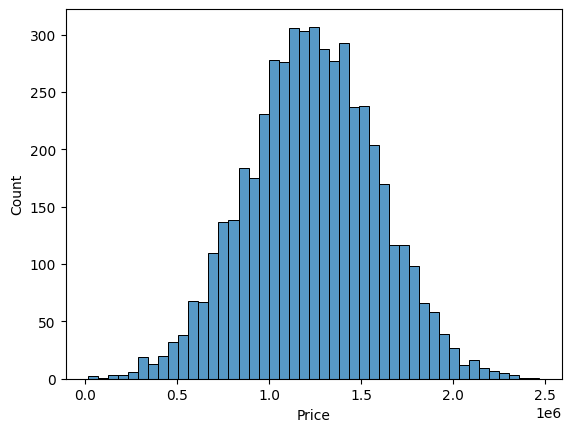

In [53]:
sns.histplot(df['Price'])

In [54]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [56]:
model=tf.keras.Sequential()

In [57]:
model.add(Dense(units=50,activation='relu'))

In [58]:
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1,activation='linear'))

In [59]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [60]:
model.fit(X_train,y_train)

110/110 [==============================] - 1s 2ms/step - loss: 1292556959744.0000 - mse: 1292556959744.0000


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                300       
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 10)                410       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2761 (10.79 KB)
Trainable params: 2761 (10.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
y_pred=model.predict(X_test)

47/47 [==============================] - 0s 2ms/step


In [63]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 291751493632.0000 - mse: 291751493632.0000


In [64]:
test_loss, test_accuracy

(291751493632.0, 291751493632.0)

In [65]:
y_pred

array([[765951.56],
       [725250.3 ],
       [745644.25],
       ...,
       [781433.1 ],
       [840753.56],
       [685705.75]], dtype=float32)

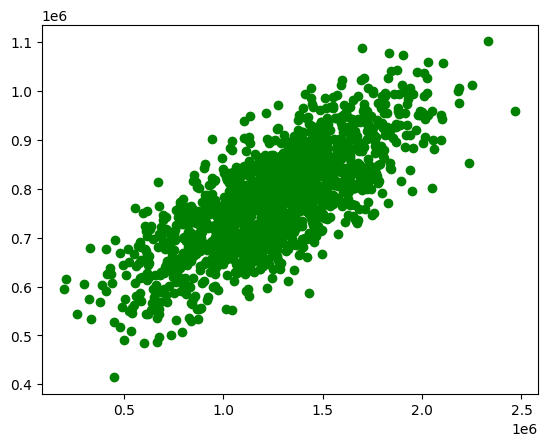

In [77]:
plt.scatter(y_test,y_pred,c="g")